# CS530 Homework 7 Part 2

Question 1 in this homework is to finish the in-class exercise with your group. Only one answer to Question 1 needs to be submitted per group. The rest of the homework, described in this notebook, should be submitted individually. 

#### Question 2. (2.5 points)

a. Files 'train.csv' and 'test.csv' contain data for the Heart Disease dataset. Use the scikit-learn package to train a logistic regression model on the training set, train.csv, and predict on the test set, test.csv. The variable that you are predicting is named 'target'. Give an accuracy of your prediction on the test set. You can find the description of the data in 'heart-disease.names' file.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

train = pd.read_csv("train.csv",index_col=0)
test = pd.read_csv("test.csv",index_col=0)
names = open("heart-disease.names","r").read()
#print(names)

In [ ]:
X_train = train.iloc[:,:13]
y_train = train['target']
log = LogisticRegression(random_state=42,max_iter=1000).fit(X_train, y_train)

X_test = test.iloc[:,:13]
y_test = test['target']
print("Accuracy: ",log.score(X_test, y_test))

Accuracy:  0.8552631578947368


b. Use the scikit-learn package to plot an ROC curve of the predictions on the test set from 1a.

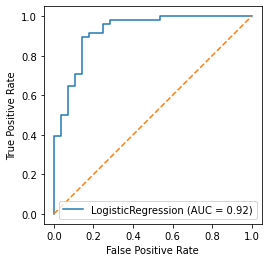

In [ ]:
metrics.plot_roc_curve(log, X_test, y_test)  
plt.plot([0,1],[0,1],"--")
plt.axis("scaled")
plt.show()  

c. Implement a function to plot the ROC curve of the model you get from on the test set. (Hints: 1. check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) of logistic regression to get the probability output. 2. Loop through a list of probability thresholds for classification and calculate the Specificity and Sensitivity for each threshold value.)

https://www.daniweb.com/programming/computer-science/tutorials/520084/understanding-roc-curves-from-scratch

In [ ]:
scores = log.predict_proba(X_test)[:,1]
thresholds = np.arange(0, 1, 1/5000)
roc = []
for threshold in thresholds:
    pred = scores > threshold
    confusion_matrix = metrics.confusion_matrix(y_test, pred)
    TN = confusion_matrix[0,0]
    TP = confusion_matrix[1,1]
    FP = confusion_matrix[0,1]
    FN = confusion_matrix[1,0]
    FPR = FP/(FP+TN)
    TPR = TP/(TP+FN)
    roc.append([FPR,TPR])
roc = np.array(roc)

Text(0, 0.5, 'TPR')

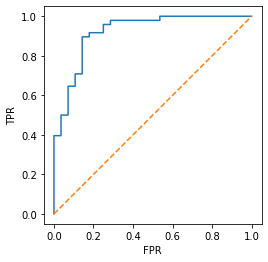

In [ ]:
plt.plot(roc[:,0],roc[:,1])
plt.plot([0,1],[0,1],"--")
plt.axis("scaled")
plt.xlabel("FPR")
plt.ylabel("TPR")

#### Question 3 (2.5 points)

a. Use the synthetic dataset (created below) to train a logistic regression model on the training set. Calculate the AUC of your prediction on the test set.

In [ ]:
X, y = datasets.make_classification(n_samples=2000, n_features=20,
                                    n_informative=3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
log = LogisticRegression(random_state=42).fit(X_train, y_train)
auc = metrics.roc_auc_score(y_test, log.predict_proba(X_test)[:,1])
print("AUC: ", auc)

AUC:  0.9570473251028807


b. Randomly sample 100, 300, and 1000 data points from the training set. For each sample size, randomly sample 1000 times, each time fit a logistic regresson, predict on the test set and calcuate the AUC. Plot a distribution of the 1000 AUCs for each sample size on the same plot. Also, plot the AUC you get from 3a as a verticle line on the same plot as well. (Hints: Plot [distributions/histogram](https://stackoverflow.com/questions/6871201/plot-two-histograms-on-single-chart-with-matplotlib).) 

In [ ]:
def AUC(sample_size):
  aucs = []
  num_rows = X_train.shape[0]
  for i in range(1000):
    indices = np.random.choice(num_rows, size=sample_size, replace=False)
    X_train_sample = X_train[indices, :]
    y_train_sample = y_train[indices]
    log = LogisticRegression(random_state=42).fit(X_train_sample, y_train_sample)
    aucs.append(metrics.roc_auc_score(y_test, log.predict_proba(X_test)[:,1]))
  return aucs

In [ ]:
sample_100 = AUC(100)
sample_300 = AUC(300)
sample_1000 = AUC(1000)

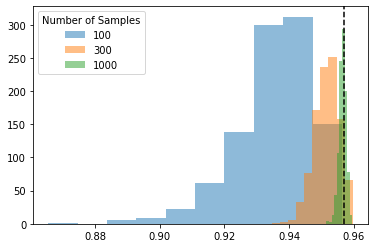

In [ ]:
plt.hist(sample_100, alpha=0.5, label='100')
plt.hist(sample_300, alpha=0.5, label='300')
plt.hist(sample_1000, alpha=0.5, label='1000')
plt.legend(loc='upper left', title='Number of Samples')
plt.axvline(auc, color="k", linestyle="dashed")
plt.show()

c. What pattern did you see from the plot you get from 3b? Explain your findings.

It is quite apparent from the histrogram that by increasing the number of samples the average AUC increases. This should be expected in that by increasing the number of samples, the model is better able to predict the target variable leading to a better, more stable model.